## Audio Analysis
The audio of a movie/video clip can be analysed using the python modules `librosa` and `pydub` . It is possible to visualise soundwaves as **audio waveforms**

### What is a waveform?
A waveform is a graphical representation of the shape and form of a signal: i.e. the magnitude of sound pressure alteration (amplitude), plotted against time (periodicity). A waveform's **amplitude** controls the wave's maximum displacement ---> amplitude = loudness

- Code reference: https://cs.marlboro.college/cours/spring2018/jims_tutorials/computational_science/feb26.attachments/AudioAnalysis.html


### Illustrating loudness 
Other than audio waveforms, we present a method of categorising samples of sound energy from an audio signal into three distinct groups; **Loud**, **Neutral**, and **Soft**. The sound samples are measured as **RMS** values


### What is a sampling rate?
The sampling rate/frequency defines the **number of samples per second** taken from a continuous signal to create a digital signal

For this particular analysis, the audio file we are working with is **16-bit**. In order to provide the best quality audio, it would be logical to use a sampling rate of **44.1 kHz (i.e., 44100 Hz)**.

### Overall method
**Audio waveform**: A waveform of the entire film audio is plotted, using a lower sampling rate of **12 kHz** rather than 44.1 kHz to avoid computational difficulty

**Loudness**: The sound RMS value is collected **every 15 seconds** from a movie audio file and categorised into one of the three categories states above, the ranges of RMS values for each category will vary depending on the input video file and are selected by experimentation, inspection, and trial and error


1) Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/MyDrive/02_FYP/02_Audio

/content/gdrive/MyDrive/02_FYP/02_Audio


In [3]:
ls

AA_2019.mp3     MIBI_2019.mp3  RPO_2018.mp3
Logan_2017.mp3  PRU_2018.mp3   TTLK_2017.mp3


2) Install pydub and import other required libraries

In [4]:
!pip install pydub

In [5]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import librosa
import numpy as np
%matplotlib inline

3) Read and process `.mp3` file and convert to `.wav` file 

In [6]:
# Read .mp3 file
mp3 = AudioSegment.from_file('Logan_2017.mp3', format = 'mp3')

# Convert to .wav file
# mp3.export('Logan_2017.wav', format = 'wav')

4) Obtain loudness (i.e., `rms`) at **15 second intervals** of movie audio

In [7]:
# Split sound into T second slices and export
T = 15        # T second interval
aud_rms = []
datapt = []
for i, chunk in enumerate(mp3[::T*1000]):
  sound = chunk.rms
  aud_rms.append(sound)
  datapt.append(i)

In [8]:
datapt_rescaled = [i * T/60 for i in datapt]

5) Plot loudness

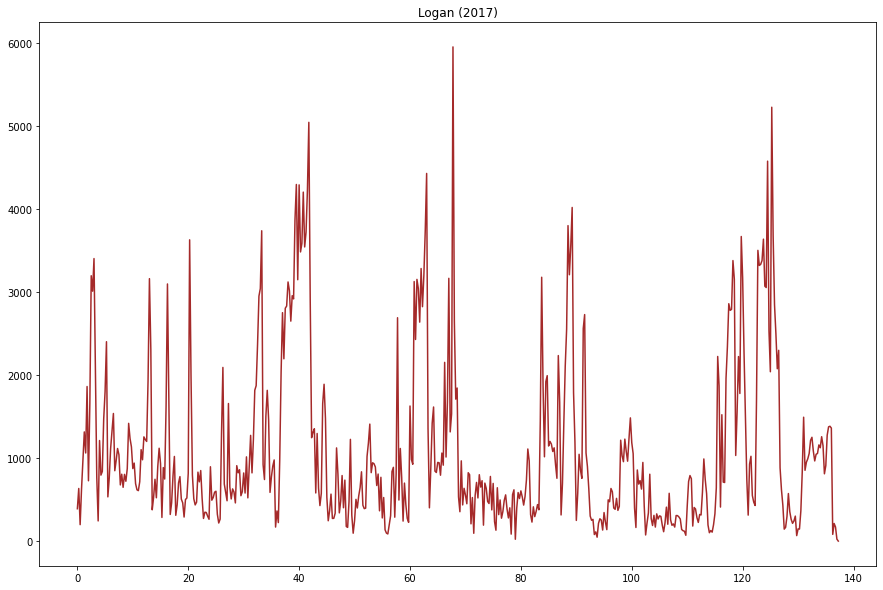

In [9]:
plt.figure(figsize = (15, 10))
plt.plot(datapt_rescaled, aud_rms, color = 'brown', linewidth = 1.5)
plt.title('Logan (2017)')
plt.show()

6) Partition sound into the following categories; **Loud (3)**, **Neutral (2)**, and **Soft (1)** given the following criteria for each category:
*   **Loud (3)** -------> Above 3000
*   **Neutral (2)** --->  Between 1000 and 3000
*   **Soft (1)** -------->  Below 1000

***NOTE***: *This criteria is derived upon inspection of the RMS plot shown above. Sound can be partitioned into various categories depending on user's choice*

In [ ]:
loud = []
datapt_loud = []
neutral = []
datapt_neutral = []
soft = []
datapt_soft = []

In [ ]:
for i, sound in zip(datapt, aud_rms):
  # Loud sounds
  if sound > 3000:
    datapt_loud.append(i)
    loud.append(3)

  # Soft sounds
  elif sound < 1000:
    datapt_soft.append(i)
    soft.append(1)

  # Neutral sounds
  else:
    datapt_neutral.append(i)
    neutral.append(2)

7) Derive summary statistics of data points in all three categories

In [ ]:
length = len(loud) + len(soft) + len(neutral)
ploud = round((len(loud)/length)*100)
pneutral = round((len(neutral)/length)*100)
psoft = 100 - ploud - pneutral
print(f'Number of LOUD data points:    {len(loud)}    ----> Proportion of LOUD datapoints: {ploud}%')
print(f'Number of NEUTRAL data points: {len(neutral)}   ----> Proportion of NEUTRAL datapoints: {pneutral}%')
print(f'Number of SOFT data points:    {len(soft)}  ----> Proportion of SOFT datapoints: {psoft}%')
print(f'\nTotal number of data points:   {length}')

Number of LOUD data points:    49    ----> Proportion of LOUD datapoints: 9%
Number of NEUTRAL data points: 147   ----> Proportion of NEUTRAL datapoints: 27%
Number of SOFT data points:    354  ----> Proportion of SOFT datapoints: 64%

Total number of data points:   550


8) Plot loudness based on categories

In [ ]:
datapt_loud_resc = [i*T/60 for i in datapt_loud]
datapt_neutral_resc = [i*T/60 for i in datapt_neutral]
datapt_soft_resc = [i*T/60 for i in datapt_soft]

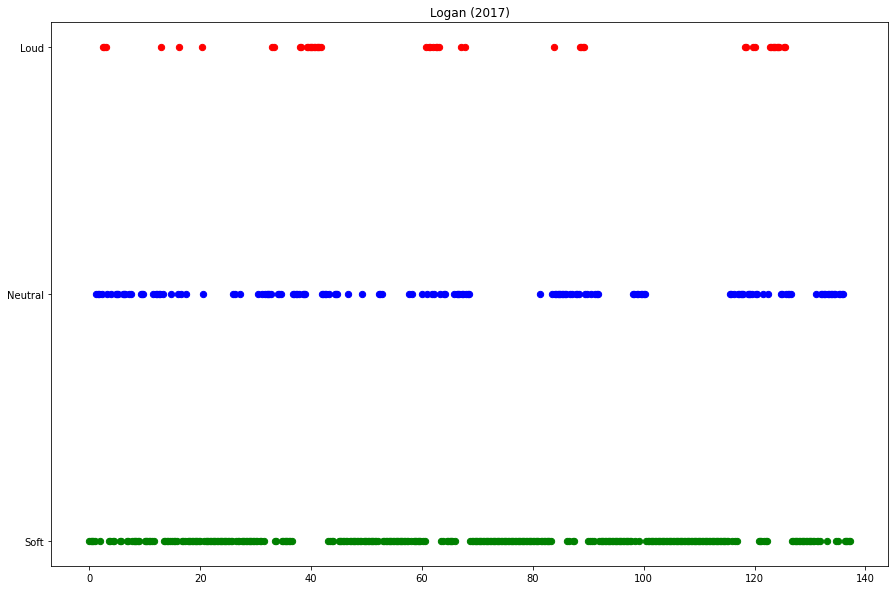

In [ ]:
fig = plt.figure(figsize = (15, 10))
fig.patch.set_facecolor('w')

ticks = [1, 2, 3]
labels = ['Soft', 'Neutral', 'Loud']

plt.title('Logan (2017)')
plt.scatter(datapt_loud_resc, loud, color = 'red', s = 40)
plt.scatter(datapt_neutral_resc, neutral, color = 'blue', s = 40)
plt.scatter(datapt_soft_resc, soft, color = 'green', s = 40)
plt.yticks(ticks, labels)

plt.show()

8) Process wav file at a sampling rate of **12 kHz**

In [ ]:
audData, rate = librosa.load('Logan_2017.wav', sr = 12000)

9) Display overview of processed audio data 

In [ ]:
print('The sampling rate (i.e. data points per second) is ' + str(rate))
print('The type of the data stored in each datum is ' + str(audData.dtype))
print('The total number of data points is ' + str(audData.shape[0]))
print('The wav length is ' + str(audData.shape[0]/rate) + ' seconds')

The sampling rate (i.e. data points per second) is 12000
The type of the data stored in each datum is float32
The total number of data points is 98919961
The wav length is 8243.330083333334 seconds


10) Plot audio waveform

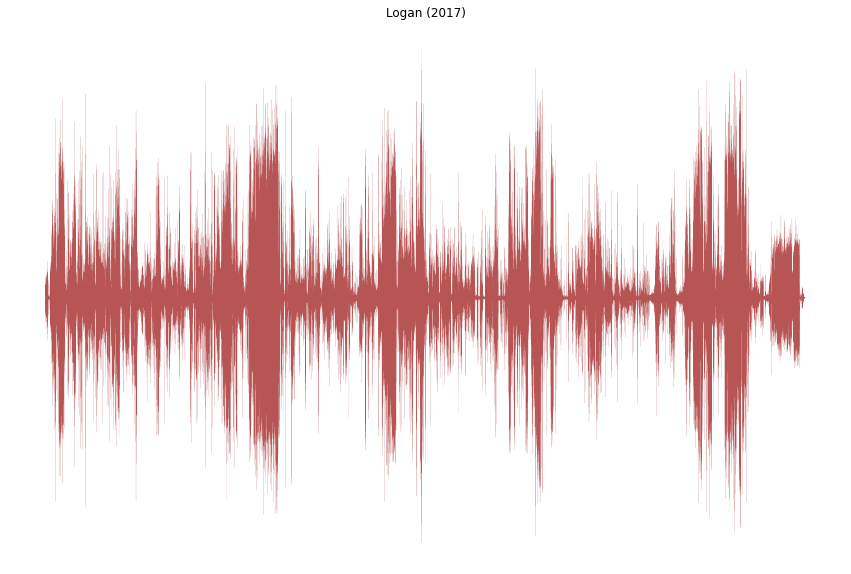

In [ ]:
# Create the time variable in seconds
time = np.arange(0, float(audData.shape[0]), 1)/rate

# Plot amplitude (or loudness) over time
plt.figure(figsize = (15,10))
plt.plot(time, audData, linewidth = 0.1, alpha = 0.8, color = 'brown')
plt.title('Logan (2017)', fontsize = 20)
plt.axis('off')
plt.show()

11) Repeat with remaining movies

- **Transformers the Last Knight (2017)**

In [10]:
# Read .mp3 file
mp3 = AudioSegment.from_file('TTLK_2017.mp3', format = 'mp3')

# Convert to .wav file 
# mp3.export('TTLK_2017.wav', format = 'wav')

In [11]:
# Split sound into T second slices and export
T = 15          # T second interval
aud_rms = []
datapt = []
for i, chunk in enumerate(mp3[::T*1000]):
  sound = chunk.rms
  aud_rms.append(sound)
  datapt.append(i)

In [12]:
datapt_rescaled = [i * T/60 for i in datapt]

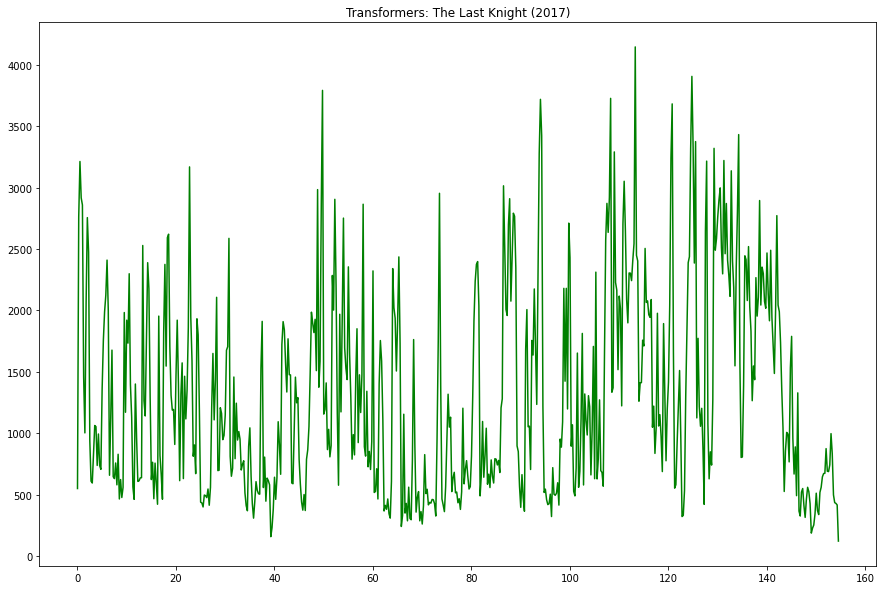

In [13]:
fig = plt.figure(figsize = (15, 10))
fig.patch.set_facecolor('w')
plt.plot(datapt_rescaled, aud_rms, color = 'green', linewidth = 1.5)
plt.title('Transformers: The Last Knight (2017)')
plt.show()

In [ ]:
loud = []
datapt_loud = []
neutral = []
datapt_neutral = []
soft = []
datapt_soft = []

In [ ]:
for i, sound in zip(datapt, aud_rms):
  # Loud sounds
  if sound > 3000:
    datapt_loud.append(i)
    loud.append(3)

  # Soft sounds
  elif sound < 1000:
    datapt_soft.append(i)
    soft.append(1)

  # Neutral sounds
  else:
    datapt_neutral.append(i)
    neutral.append(2)

In [ ]:
length = len(loud) + len(soft) + len(neutral)
ploud = round((len(loud)/length)*100)
pneutral = round((len(neutral)/length)*100)
psoft = 100 - ploud - pneutral
print(f'Number of LOUD data points:    {len(loud)}    ----> Proportion of LOUD datapoints: {ploud}%')
print(f'Number of NEUTRAL data points: {len(neutral)}   ----> Proportion of NEUTRAL datapoints: {pneutral}%')
print(f'Number of SOFT data points:    {len(soft)}  ----> Proportion of SOFT datapoints: {psoft}%')
print(f'\nTotal number of data points:   {length}')

Number of LOUD data points:    22    ----> Proportion of LOUD datapoints: 4%
Number of NEUTRAL data points: 312   ----> Proportion of NEUTRAL datapoints: 50%
Number of SOFT data points:    285  ----> Proportion of SOFT datapoints: 46%

Total number of data points:   619


In [ ]:
datapt_loud_resc = [i*T/60 for i in datapt_loud]
datapt_neutral_resc = [i*T/60 for i in datapt_neutral]
datapt_soft_resc = [i*T/60 for i in datapt_soft]

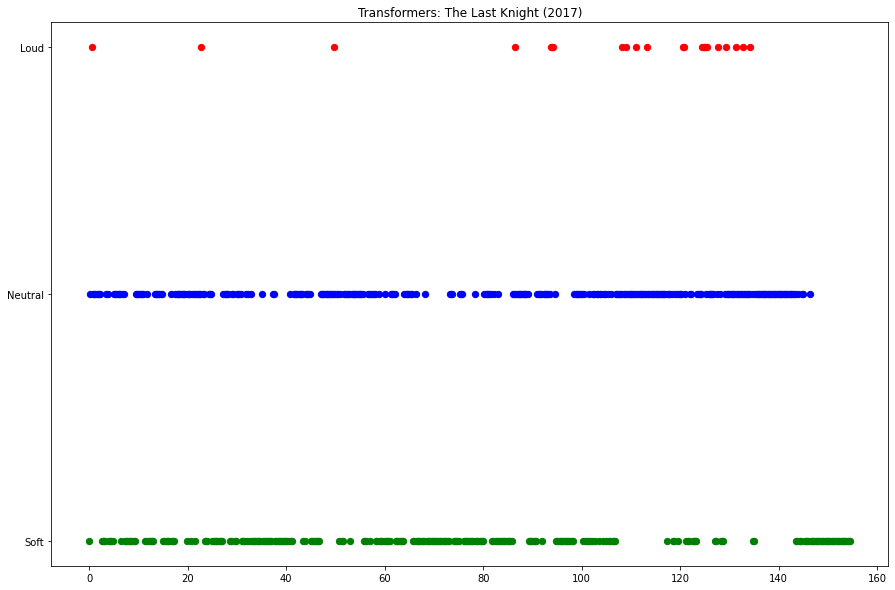

In [ ]:
fig = plt.figure(figsize = (15, 10))
fig.patch.set_facecolor('w')

ticks = [1, 2, 3]
labels = ['Soft', 'Neutral', 'Loud']

plt.scatter(datapt_loud_resc, loud, color = 'red', s = 40)
plt.scatter(datapt_neutral_resc, neutral, color = 'blue', s = 40)
plt.scatter(datapt_soft_resc, soft, color = 'green', s = 40)
plt.title('Transformers: The Last Knight (2017)')
plt.yticks(ticks, labels)

plt.show()

In [ ]:
# Read .wav file 
audData, rate = librosa.load('TTLK_2017.wav', sr = 12000)

In [ ]:
# Display overview of audio data 
print('The sampling rate (i.e. data points per second) is ' + str(rate))
print('The type of the data stored in each datum is ' + str(audData.dtype))
print('The total number of data points is ' + str(audData.shape[0]))
print('The wav length is ' + str(audData.shape[0] / rate) + ' seconds')

The sampling rate (i.e. data points per second) is 12000
The type of the data stored in each datum is float32
The total number of data points is 111345841
The wav length is 9278.820083333334 seconds


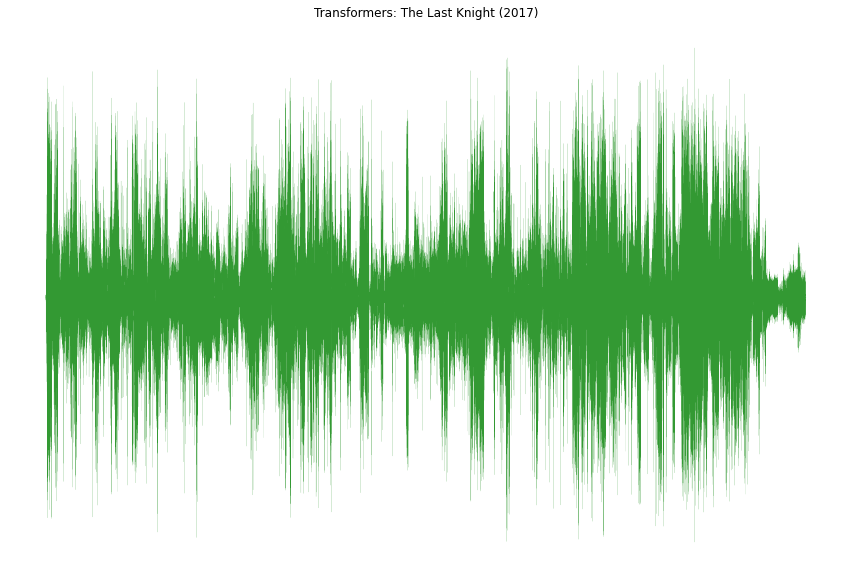

In [ ]:
# Create the time variable in seconds
time = np.arange(0, float(audData.shape[0]), 1)/rate

# Plot amplitude (or loudness) over time
plt.figure(figsize = (15,10))
plt.plot(time, audData, linewidth = 0.1, alpha = 0.8, color = 'green')
plt.title('Transformers: The Last Knight (2017)')
plt.axis('off')
plt.show()

- **Ready Player One (2018)**

In [14]:
# Read .mp3 file
mp3 = AudioSegment.from_file('RPO_2018.mp3', format = 'mp3')

# Convert to .wav file 
# mp3.export('RPO_2018.wav', format = 'wav')

In [15]:
# Split sound into T second slices and export
T = 15          # T second interval
aud_rms = []
datapt = []
for i, chunk in enumerate(mp3[::T*1000]):
  sound = chunk.rms
  aud_rms.append(sound)
  datapt.append(i)

In [16]:
datapt_rescaled = [i * T/60 for i in datapt]

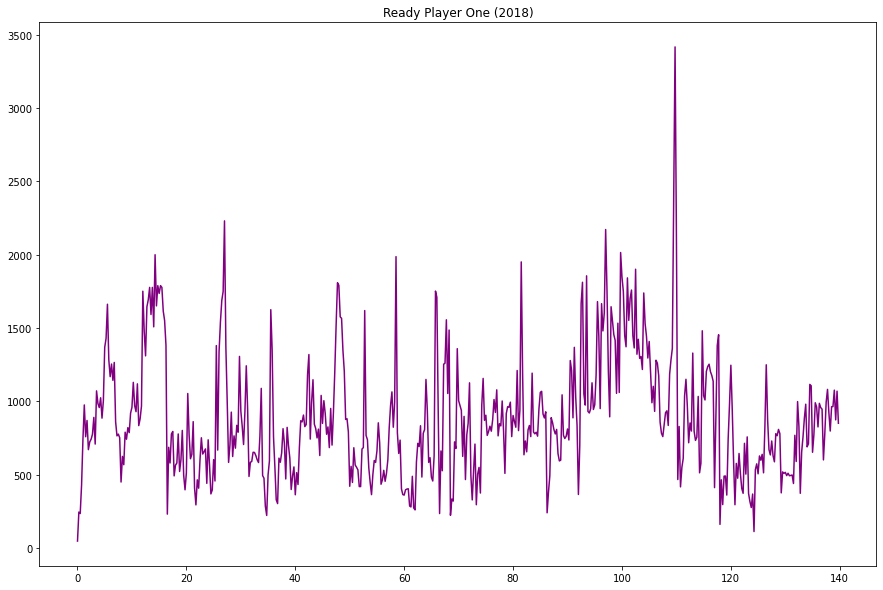

In [17]:
fig = plt.figure(figsize = (15, 10))
fig.patch.set_facecolor('w')
plt.plot(datapt_rescaled, aud_rms, color = 'purple', linewidth = 1.5)
plt.title('Ready Player One (2018)')
plt.show()

In [ ]:
loud = []
datapt_loud = []
neutral = []
datapt_neutral = []
soft = []
datapt_soft = []

In [ ]:
for i, sound in zip(datapt, aud_rms):
  # Loud sounds
  if sound > 3000:
    datapt_loud.append(i)
    loud.append(3)

  # Soft sounds
  elif sound < 1000:
    datapt_soft.append(i)
    soft.append(1)

  # Neutral sounds
  else:
    datapt_neutral.append(i)
    neutral.append(2)

In [ ]:
length = len(loud) + len(soft) + len(neutral)
ploud = round((len(loud)/length)*100)
pneutral = round((len(neutral)/length)*100)
psoft = 100 - ploud - pneutral
print(f'Number of LOUD data points:    {len(loud)}    ----> Proportion of LOUD datapoints: {ploud}%')
print(f'Number of NEUTRAL data points: {len(neutral)}   ----> Proportion of NEUTRAL datapoints: {pneutral}%')
print(f'Number of SOFT data points:    {len(soft)}  ----> Proportion of SOFT datapoints: {psoft}%')
print(f'\nTotal number of data points:   {length}')

Number of LOUD data points:    1    ----> Proportion of LOUD datapoints: 0%
Number of NEUTRAL data points: 161   ----> Proportion of NEUTRAL datapoints: 29%
Number of SOFT data points:    398  ----> Proportion of SOFT datapoints: 71%

Total number of data points:   560


In [ ]:
datapt_loud_resc = [i*T/60 for i in datapt_loud]
datapt_neutral_resc = [i*T/60 for i in datapt_neutral]
datapt_soft_resc = [i*T/60 for i in datapt_soft]

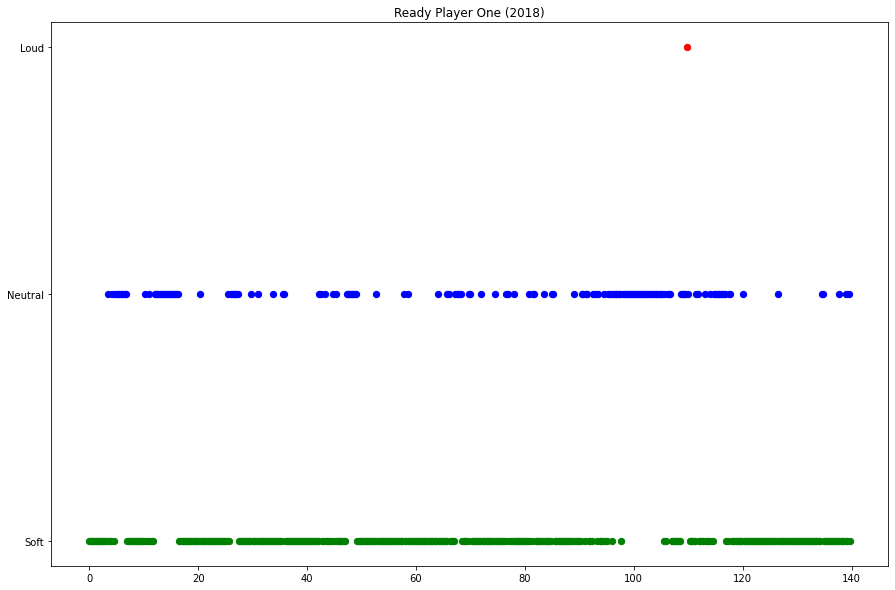

In [ ]:
fig = plt.figure(figsize = (15, 10))
fig.patch.set_facecolor('w')

ticks = [1, 2, 3]
labels = ['Soft', 'Neutral', 'Loud']

plt.scatter(datapt_loud_resc, loud, color = 'red', s = 40)
plt.scatter(datapt_neutral_resc, neutral, color = 'blue', s = 40)
plt.scatter(datapt_soft_resc, soft, color = 'green', s = 40)
plt.title('Ready Player One (2018)')
plt.yticks(ticks, labels)

plt.show()

In [ ]:
# Read .wav file 
audData, rate = librosa.load('RPO_2018.wav', sr = 12000)

In [ ]:
# Display overview of audio data
print('The sampling rate (i.e. data points per second) is ' + str(rate))
print('The type of the data stored in each datum is ' + str(audData.dtype))
print('The total number of data points is ' + str(audData.shape[0]))
print('The wav length is ' + str(audData.shape[0] / rate) + ' seconds')

The sampling rate (i.e. data points per second) is 12000
The type of the data stored in each datum is float32
The total number of data points is 100748641
The wav length is 8395.720083333334 seconds


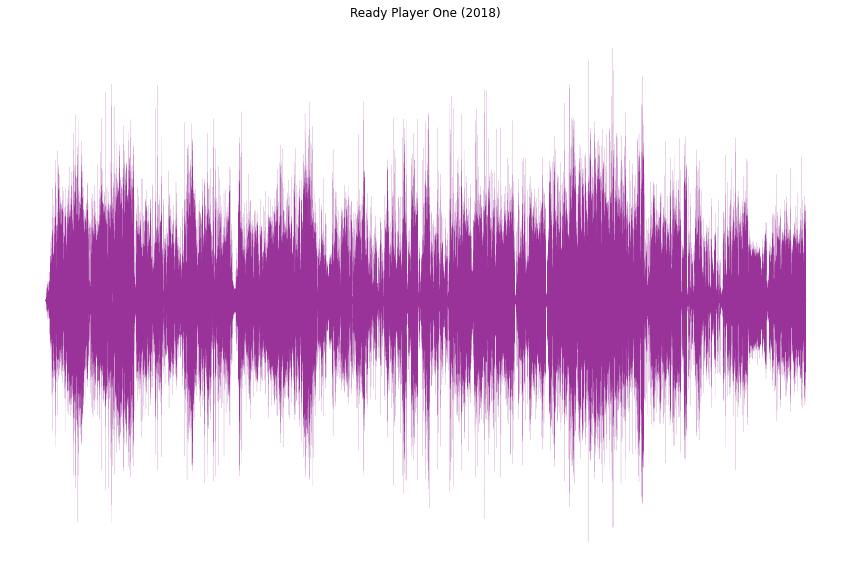

In [ ]:
# Create the time variable in seconds
time = np.arange(0, float(audData.shape[0]), 1)/rate

# Plot amplitude (or loudness) over time
plt.figure(figsize = (15,10))
plt.plot(time, audData, linewidth = 0.1, alpha = 0.8, color = 'purple')
plt.title('Ready Player One (2018)')
plt.axis('off')
plt.show()

- **Pacific Rim: Uprising (2018)**

In [18]:
# Read .mp3 file
mp3 = AudioSegment.from_file('PRU_2018.mp3', format = 'mp3')

# Convert to .wav file 
# mp3.export('PRU_2018.wav', format = 'wav')

In [19]:
# Split sound into T second slices and export
T = 15          # T second interval
aud_rms = []
datapt = []
for i, chunk in enumerate(mp3[::T*1000]):
  sound = chunk.rms
  aud_rms.append(sound)
  datapt.append(i)

In [20]:
datapt_rescaled = [i * T/60 for i in datapt]

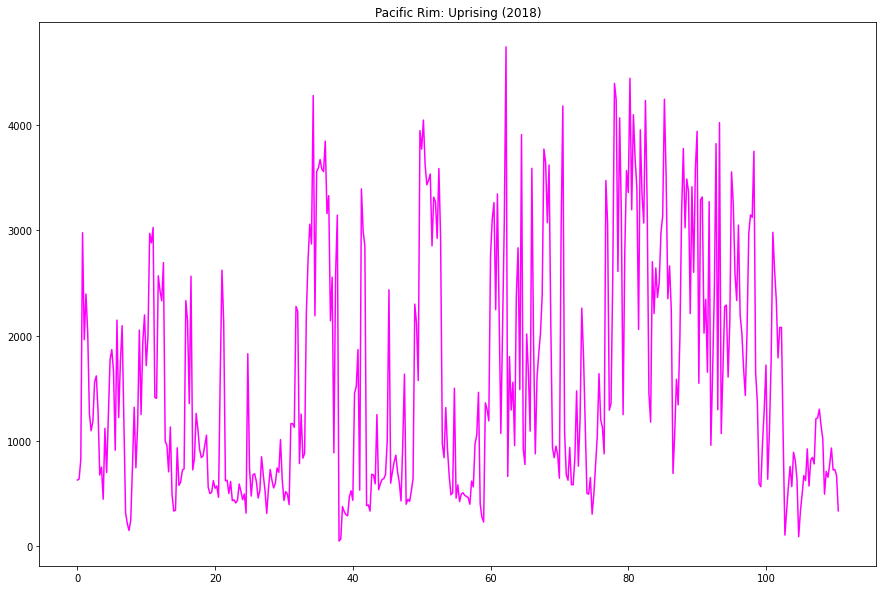

In [21]:
fig = plt.figure(figsize = (15, 10))
fig.patch.set_facecolor('w')
plt.plot(datapt_rescaled, aud_rms, color = 'magenta', linewidth = 1.5)
plt.title('Pacific Rim: Uprising (2018)')
plt.show()

In [ ]:
loud = []
datapt_loud = []
neutral = []
datapt_neutral = []
soft = []
datapt_soft = []

In [ ]:
for i, sound in zip(datapt, aud_rms):
  # Loud sounds
  if sound > 3000:
    datapt_loud.append(i)
    loud.append(3)

  # Soft sounds
  elif sound < 1000:
    datapt_soft.append(i)
    soft.append(1)

  # Neutral sounds
  else:
    datapt_neutral.append(i)
    neutral.append(2)

In [ ]:
length = len(loud) + len(soft) + len(neutral)
ploud = round((len(loud)/length)*100)
pneutral = round((len(neutral)/length)*100)
psoft = 100 - ploud - pneutral
print(f'Number of LOUD data points:    {len(loud)}    ----> Proportion of LOUD datapoints: {ploud}%')
print(f'Number of NEUTRAL data points: {len(neutral)}   ----> Proportion of NEUTRAL datapoints: {pneutral}%')
print(f'Number of SOFT data points:    {len(soft)}  ----> Proportion of SOFT datapoints: {psoft}%')
print(f'\nTotal number of data points:   {length}')

Number of LOUD data points:    76    ----> Proportion of LOUD datapoints: 17%
Number of NEUTRAL data points: 177   ----> Proportion of NEUTRAL datapoints: 40%
Number of SOFT data points:    190  ----> Proportion of SOFT datapoints: 43%

Total number of data points:   443


In [ ]:
datapt_loud_resc = [i*T/60 for i in datapt_loud]
datapt_neutral_resc = [i*T/60 for i in datapt_neutral]
datapt_soft_resc = [i*T/60 for i in datapt_soft]

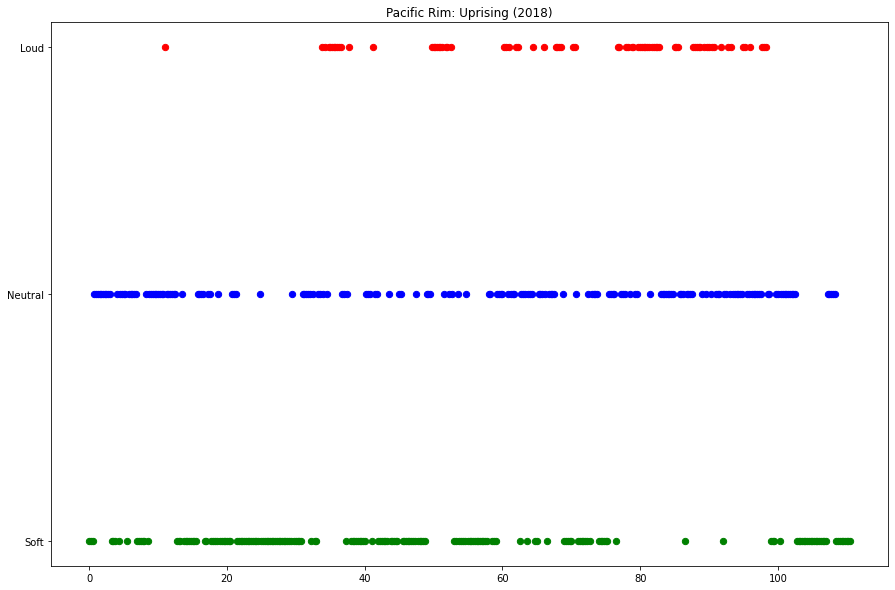

In [ ]:
fig = plt.figure(figsize = (15, 10))
fig.patch.set_facecolor('w')

ticks = [1, 2, 3]
labels = ['Soft', 'Neutral', 'Loud']

plt.scatter(datapt_loud_resc, loud, color = 'red', s = 40)
plt.scatter(datapt_neutral_resc, neutral, color = 'blue', s = 40)
plt.scatter(datapt_soft_resc, soft, color = 'green', s = 40)
plt.title('Pacific Rim: Uprising (2018)')
plt.yticks(ticks, labels)

plt.show()

In [ ]:
# Read .wav file 
audData, rate = librosa.load('PRU_2018.wav', sr = 12000)

In [ ]:
# Display overview of audio data 
print('The sampling rate (i.e. data points per second) is ' + str(rate))
print('The type of the data stored in each datum is ' + str(audData.dtype))
print('The total number of data points is ' + str(audData.shape[0]))
print('The wav length is ' + str(audData.shape[0] / rate) + ' seconds')

The sampling rate (i.e. data points per second) is 12000
The type of the data stored in each datum is float32
The total number of data points is 79707000
The wav length is 6642.25 seconds


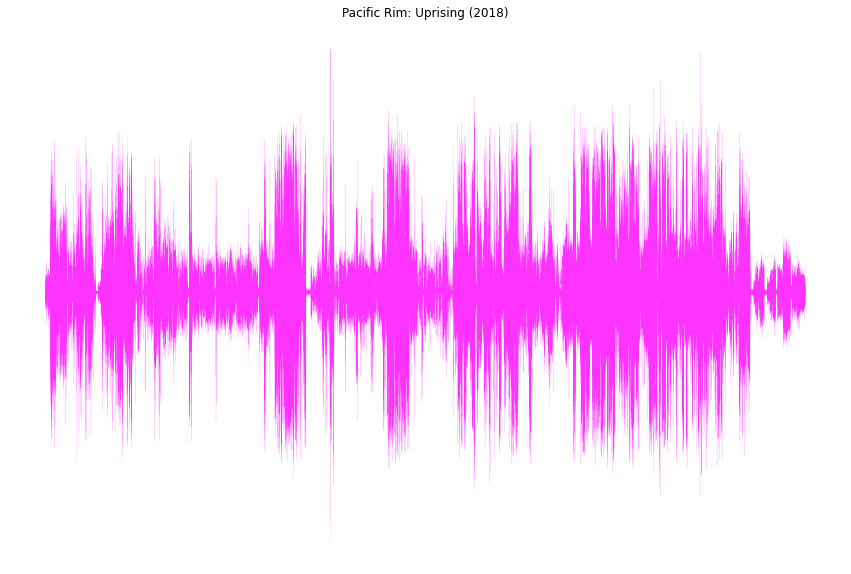

In [ ]:
# Create the time variable in seconds
time = np.arange(0, float(audData.shape[0]), 1)/rate

# Plot amplitude (or loudness) over time
plt.figure(figsize = (15,10))
plt.plot(time, audData, linewidth = 0.1, alpha = 0.8, color = 'magenta')
plt.title('Pacific Rim: Uprising (2018)')
plt.axis('off')
plt.show()

- **Ad Astra (2019)**

In [22]:
# Read .mp3 file
mp3 = AudioSegment.from_file('AA_2019.mp3', format = 'mp3')

# Convert to .wav file 
# mp3.export('AA_2019.wav', format = 'wav')

In [23]:
# Split sound into T second slices and export
T = 15          # T second interval
aud_rms = []
datapt = []
for i, chunk in enumerate(mp3[::T*1000]):
  sound = chunk.rms
  aud_rms.append(sound)
  datapt.append(i)

In [24]:
datapt_rescaled = [i * T/60 for i in datapt]

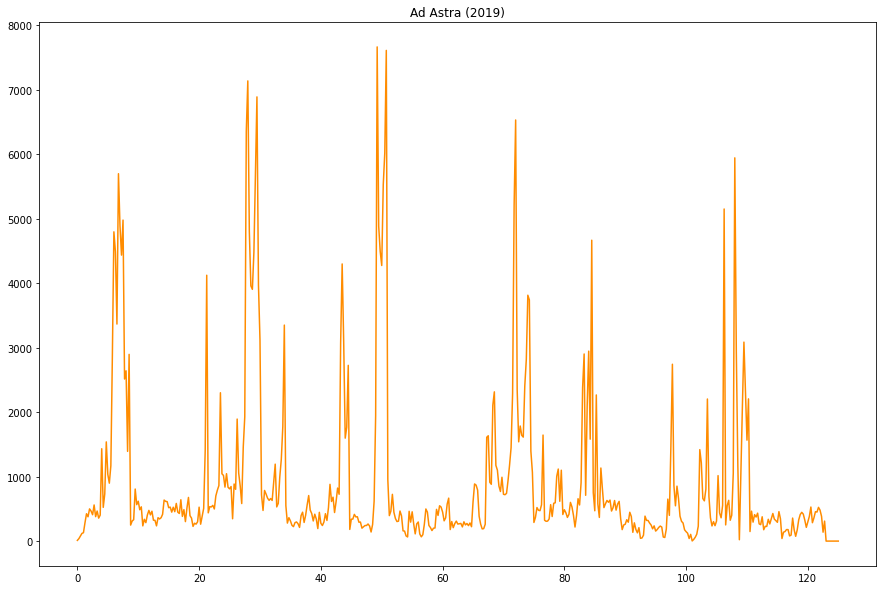

In [25]:
fig = plt.figure(figsize = (15, 10))
fig.patch.set_facecolor('w')
plt.plot(datapt_rescaled, aud_rms, color = 'darkorange', linewidth = 1.5)
plt.title('Ad Astra (2019)')
plt.show()

In [ ]:
loud = []
datapt_loud = []
neutral = []
datapt_neutral = []
soft = []
datapt_soft = []

In [ ]:
for i, sound in zip(datapt, aud_rms):
  # Loud sounds
  if sound > 3000:
    datapt_loud.append(i)
    loud.append(3)

  # Soft sounds
  elif sound < 1000:
    datapt_soft.append(i)
    soft.append(1)

  # Neutral sounds
  else:
    datapt_neutral.append(i)
    neutral.append(2)

In [ ]:
length = len(loud) + len(soft) + len(neutral)
ploud = round((len(loud)/length)*100)
pneutral = round((len(neutral)/length)*100)
psoft = 100 - ploud - pneutral
print(f'Number of LOUD data points:    {len(loud)}    ----> Proportion of LOUD datapoints: {ploud}%')
print(f'Number of NEUTRAL data points: {len(neutral)}   ----> Proportion of NEUTRAL datapoints: {pneutral}%')
print(f'Number of SOFT data points:    {len(soft)}  ----> Proportion of SOFT datapoints: {psoft}%')
print(f'\nTotal number of data points:   {length}')

Number of LOUD data points:    37    ----> Proportion of LOUD datapoints: 7%
Number of NEUTRAL data points: 68   ----> Proportion of NEUTRAL datapoints: 14%
Number of SOFT data points:    396  ----> Proportion of SOFT datapoints: 79%

Total number of data points:   501


In [ ]:
datapt_loud_resc = [i*T/60 for i in datapt_loud]
datapt_neutral_resc = [i*T/60 for i in datapt_neutral]
datapt_soft_resc = [i*T/60 for i in datapt_soft]

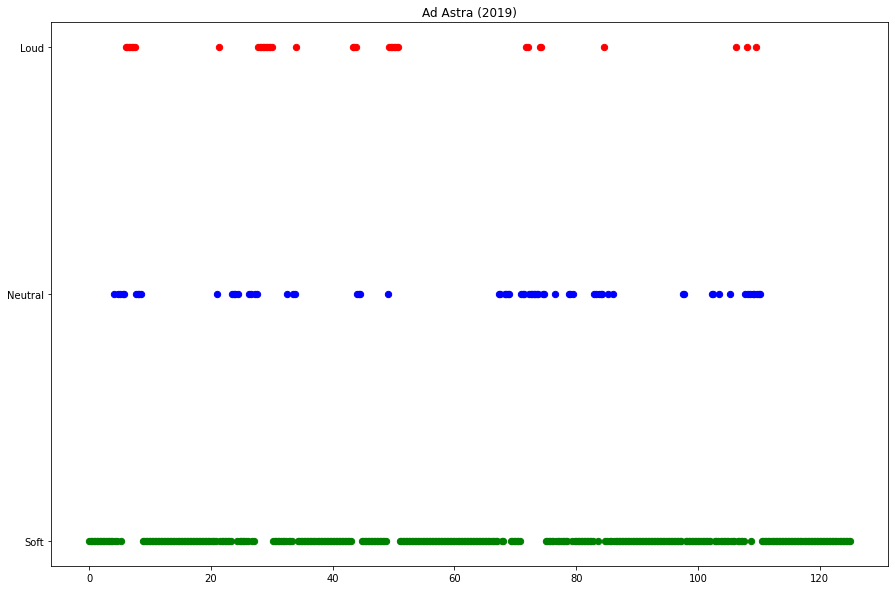

In [ ]:
fig = plt.figure(figsize = (15, 10))
fig.patch.set_facecolor('w')

ticks = [1, 2, 3]
labels = ['Soft', 'Neutral', 'Loud']

plt.scatter(datapt_loud_resc, loud, color = 'red', s = 40)
plt.scatter(datapt_neutral_resc, neutral, color = 'blue', s = 40)
plt.scatter(datapt_soft_resc, soft, color = 'green', s = 40)
plt.title('Ad Astra (2019)')
plt.yticks(ticks, labels)

plt.show()

In [ ]:
# Read .wav file 
audData, rate = librosa.load('AA_2019.wav', sr = 12000)

In [ ]:
# Display overview of audio data 
print('The sampling rate (i.e. data points per second) is ' + str(rate))
print('The type of the data stored in each datum is ' + str(audData.dtype))
print('The total number of data points is ' + str(audData.shape[0]))
print('The wav length is ' + str(audData.shape[0] / rate) + ' seconds')

The sampling rate (i.e. data points per second) is 12000
The type of the data stored in each datum is float32
The total number of data points is 90136801
The wav length is 7511.400083333333 seconds


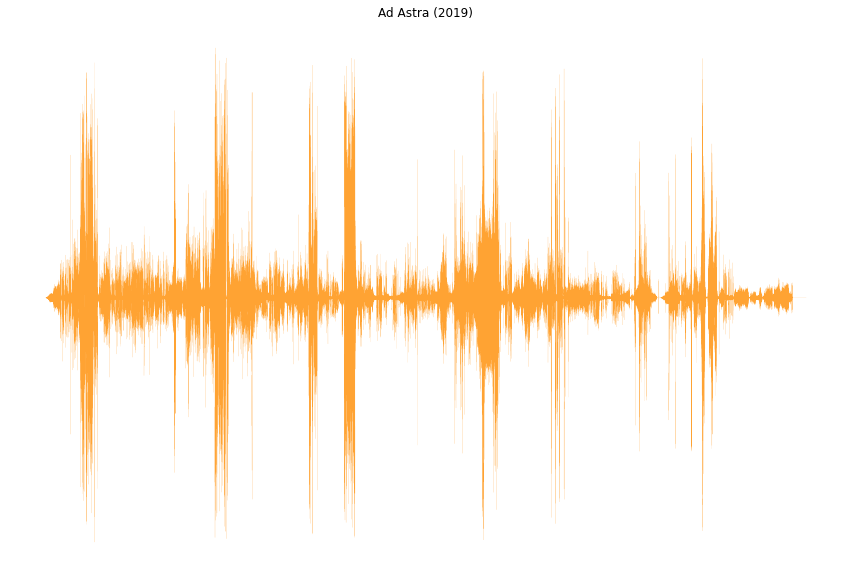

In [ ]:
# Create the time variable in seconds
time = np.arange(0, float(audData.shape[0]), 1)/rate

# Plot amplitude (or loudness) over time
plt.figure(figsize = (15,10))
plt.plot(time, audData, linewidth = 0.1, alpha = 0.8, color = 'darkorange')
plt.title('Ad Astra (2019)')
plt.axis('off')
plt.show()

- **Men In Black: International (2019)**

In [26]:
# Read .mp3 file
mp3 = AudioSegment.from_file('MIBI_2019.mp3', format = 'mp3')

# Convert to .wav file 
# mp3.export('MIBI_2019.wav', format = 'wav')

In [27]:
# Split sound into T second slices and export
T = 15          # T second interval
aud_rms = []
datapt = []
for i, chunk in enumerate(mp3[::T*1000]):
  sound = chunk.rms
  aud_rms.append(sound)
  datapt.append(i)

In [28]:
datapt_rescaled = [i * T/60 for i in datapt]

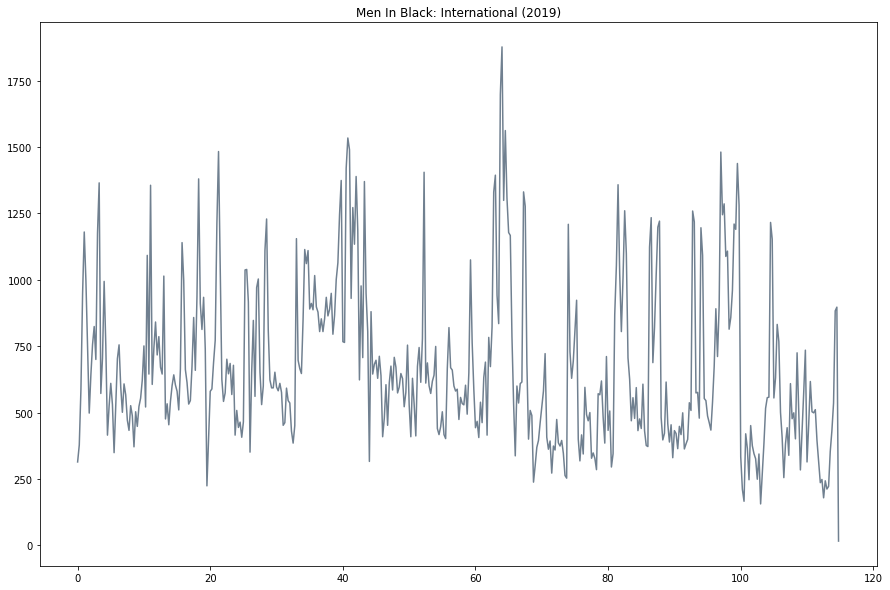

In [29]:
fig = plt.figure(figsize = (15, 10))
fig.patch.set_facecolor('w')
plt.plot(datapt_rescaled, aud_rms, color = 'slategrey', linewidth = 1.5)
plt.title('Men In Black: International (2019)')
plt.show()

In [ ]:
loud = []
datapt_loud = []
neutral = []
datapt_neutral = []
soft = []
datapt_soft = []

In [ ]:
for i, sound in zip(datapt, aud_rms):
  # Loud sounds
  if sound > 3000:
    datapt_loud.append(i)
    loud.append(3)

  # Soft sounds
  elif sound < 1000:
    datapt_soft.append(i)
    soft.append(1)

  # Neutral sounds
  else:
    datapt_neutral.append(i)
    neutral.append(2)

In [ ]:
length = len(loud) + len(soft) + len(neutral)
ploud = round((len(loud)/length)*100)
pneutral = round((len(neutral)/length)*100)
psoft = 100 - ploud - pneutral
print(f'Number of LOUD data points:    {len(loud)}    ----> Proportion of LOUD datapoints: {ploud}%')
print(f'Number of NEUTRAL data points: {len(neutral)}   ----> Proportion of NEUTRAL datapoints: {pneutral}%')
print(f'Number of SOFT data points:    {len(soft)}  ----> Proportion of SOFT datapoints: {psoft}%')
print(f'\nTotal number of data points:   {length}')

Number of LOUD data points:    0    ----> Proportion of LOUD datapoints: 0%
Number of NEUTRAL data points: 73   ----> Proportion of NEUTRAL datapoints: 16%
Number of SOFT data points:    387  ----> Proportion of SOFT datapoints: 84%

Total number of data points:   460


In [ ]:
datapt_loud_resc = [i*T/60 for i in datapt_loud]
datapt_neutral_resc = [i*T/60 for i in datapt_neutral]
datapt_soft_resc = [i*T/60 for i in datapt_soft]

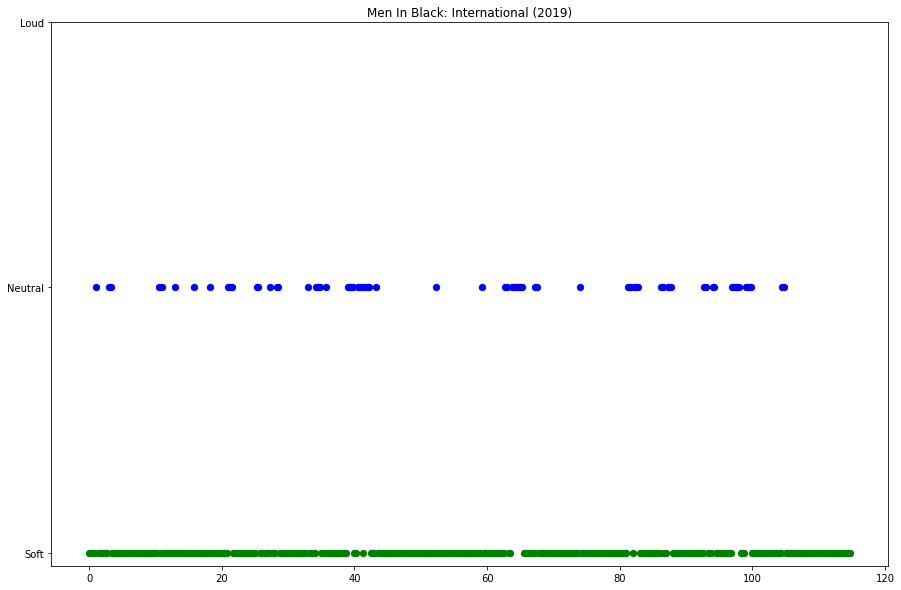

In [ ]:
fig = plt.figure(figsize = (15, 10))
fig.patch.set_facecolor('w')

ticks = [1, 2, 3]
labels = ['Soft', 'Neutral', 'Loud']

plt.scatter(datapt_loud_resc, loud, color = 'red', s = 40)
plt.scatter(datapt_neutral_resc, neutral, color = 'blue', s = 40)
plt.scatter(datapt_soft_resc, soft, color = 'green', s = 40)
plt.title('Men In Black: International (2019)')
plt.yticks(ticks, labels)

plt.show()

In [ ]:
# Read .wav file 
audData, rate = librosa.load('MIBI_2019.wav', sr = 12000)

In [ ]:
# Display overview of audio data 
print('The sampling rate (i.e. data points per second) is ' + str(rate))
print('The type of the data stored in each datum is ' + str(audData.dtype))
print('The total number of data points is ' + str(audData.shape[0]))
print('The wav length is ' + str(audData.shape[0] / rate) + ' seconds')

The sampling rate (i.e. data points per second) is 12000
The type of the data stored in each datum is float32
The total number of data points is 82663081
The wav length is 6888.5900833333335 seconds


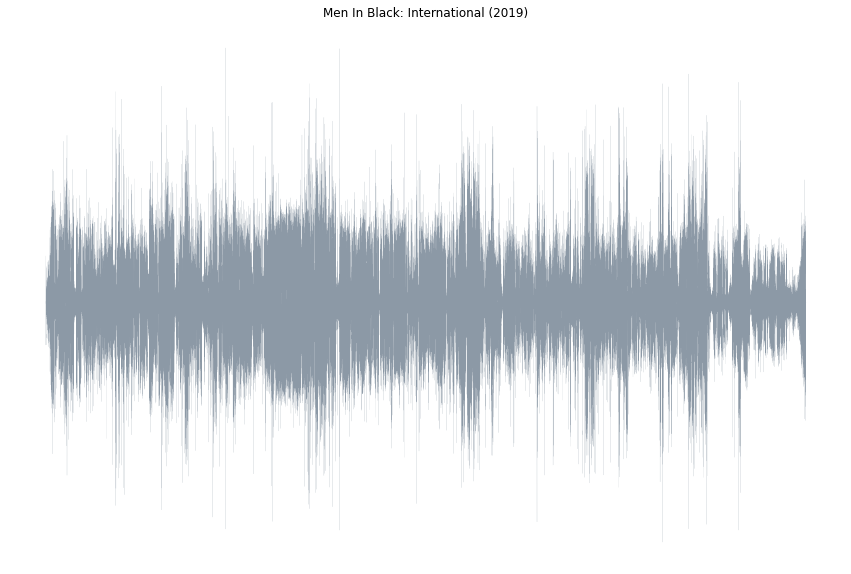

In [ ]:
# Create the time variable in seconds
time = np.arange(0, float(audData.shape[0]), 1)/rate

# Plot amplitude (or loudness) over time
plt.figure(figsize = (15,10))
plt.plot(time, audData, linewidth = 0.1, alpha = 0.8, color = 'slategrey')
plt.title('Men In Black: International (2019)')
plt.axis('off')
plt.show()